In [ ]:
'''
最邻近分类的python实现方法

在距离空间里，如果一个样本的最接近的k个邻居里，绝大多数属于某个类别，则该样本也属于这个类别

电影分类 / 植物分类

'''

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

      name  fight  kiss     type
0  北京遇上西雅图      3   104  Romance
1      喜欢你      2   100  Romance
2    疯狂动物城      1    81  Romance
3      战狼2    101    10   Action
4       力王     99     5   Action
5      敢死队     98     2   Action
-------
预测电影类型为: ['Romance']


Text(18, 90, '《你的名字》')

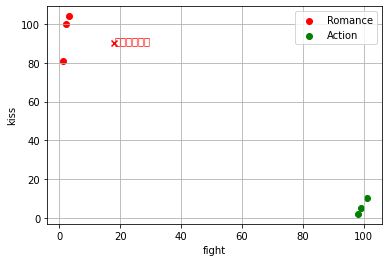

In [3]:
#  案例一：电影数据分类

from sklearn import neighbors  # 导入KNN分类模块
import warnings
warnings.filterwarnings('ignore') 
# 不发出警告

data = pd.DataFrame({'name':['北京遇上西雅图','喜欢你','疯狂动物城','战狼2','力王','敢死队'],
                  'fight':[3,2,1,101,99,98],
                  'kiss':[104,100,81,10,5,2],
                  'type':['Romance','Romance','Romance','Action','Action','Action']})
print(data)
print('-------')
#  创建数据

knn = neighbors.KNeighborsClassifier()   # 取得knn分类器
knn.fit(data[['fight','kiss']], data['type'])
print('预测电影类型为:', knn.predict([[18, 90]]))
# 加载数据，构建KNN分类模型
# 预测未知数据

plt.scatter(data[data['type'] == 'Romance']['fight'],data[data['type'] == 'Romance']['kiss'],color = 'r',marker = 'o',label = 'Romance')
plt.scatter(data[data['type'] == 'Action']['fight'],data[data['type'] == 'Action']['kiss'],color = 'g',marker = 'o',label = 'Action')
plt.grid()
plt.legend()
plt.scatter(18,90,color = 'r',marker = 'x',label = 'Romance')
plt.ylabel('kiss')
plt.xlabel('fight')
plt.text(18,90,'《你的名字》',color = 'r')
# 绘制图表

       fight       kiss     type
0   3.367801  -1.756637   Action
1 -11.201661  33.991257  Romance
2 -52.679732 -12.929249  Romance
3  22.000273 -33.753190   Action
4  58.244709  26.917861   Action
------


Text(0.5, 0, 'fight')

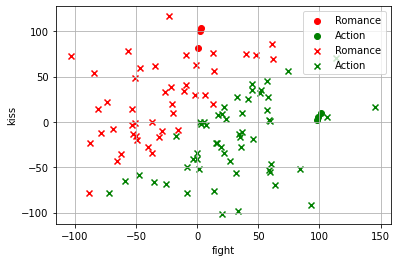

In [4]:
# 案例一：电影分类
# 给随机数据进行模拟预测

data2 = pd.DataFrame(np.random.randn(100,2)*50,columns = ['fight','kiss'])
data2['type'] = knn.predict(data2)
print(data2.head())
print('------')
# 创建数据，并调用模型预测

plt.scatter(data[data['type'] == 'Romance']['fight'],data[data['type'] == 'Romance']['kiss'],color = 'r',marker = 'o',label = 'Romance')
plt.scatter(data[data['type'] == 'Action']['fight'],data[data['type'] == 'Action']['kiss'],color = 'g',marker = 'o',label = 'Action')
plt.grid()
plt.scatter(data2[data2['type'] == 'Romance']['fight'],data2[data2['type'] == 'Romance']['kiss'],color = 'r',marker = 'x',label = 'Romance')
plt.scatter(data2[data2['type'] == 'Action']['fight'],data2[data2['type'] == 'Action']['kiss'],color = 'g',marker = 'x',label = 'Action')
plt.legend()
plt.ylabel('kiss')
plt.xlabel('fight')
# 绘制图表

In [5]:
# 案例二：植物分类

from sklearn import datasets
iris = datasets.load_iris()
print(iris.keys())
print('数据长度为:%i条' % len(iris['data']))
# 导入数据

print(iris.feature_names)
print(iris.target_names)
#print(iris.target)
print(iris.data[:5])
# 150个实例数据
# feature_names - 特征分类：萼片长度，萼片宽度，花瓣长度，花瓣宽度  → sepal length, sepal width, petal length, petal width
# 目标类别：Iris setosa, Iris versicolor, Iris virginica. 

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
数据长度为:150条
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [6]:
# 案例二：植物分类

df = pd.DataFrame(iris.data, columns = iris.feature_names)  # 将特征值转为Dataframe
df['target'] = iris.target 
ty = pd.DataFrame({'target':[0,1,2],
                  'target_names':iris.target_names})
df = pd.merge(df, ty, on = 'target')
# 数据转换

knn = neighbors.KNeighborsClassifier()   # 取得knn分类器
knn.fit(iris.data, df['target_names'])
# 建立分类模型

pre_data = [[0.1, 0.2, 0.3, 0.4]]
print('预测结果为:', knn.predict(pre_data))
# 预测结果

df.head()
# 显示数据

预测结果为: ['setosa']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
